# Data Loading

In [1]:
Hepta2008 <- read.csv("Data/ProcessedDatasets/2008WomanHeptathlon.csv")
head(Hepta2008)
Hepta2008 <- as.matrix(Hepta2008[4:ncol(Hepta2008)])

,Athlete,Country,Overall.points,X100.m.H,HJ,SP,X200.m,LJ,JT,X800.m
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Nataliya Dobrynska,Ukraine,6733,1059,978,1015,944,1049,833,855
2,Hyleas Fountain,United States,6619,1158,1093,751,1058,969,704,886
3,Kelly Sotherton,Great Britain,6517,1097,1016,785,1040,953,622,1004
4,Jessica Zelinka,Canada,6490,1129,941,780,1016,887,742,995
5,Anna Bogdanova,Russia,6465,1111,1054,799,958,991,579,973
6,Karolina Tyminska,Poland,6428,1033,941,799,1040,1017,590,1008


# Probabilistic PCA Comparison

In [ ]:
library("pcaMethods")
library("Rdimtools")

# Plot comparison

## Dimension 1

When calling the ppca method with only one component to estimate (dimension 1) the Rdimtools package outputs ``non conformable arguments`` so we call the same function with dimension two and only take the first one.

In [15]:
p.rdim1 <- do.ppca(Hepta2008, ndim = 2)
p.pca1 <-  pca(Hepta2008, method="ppca", nPcs=1, seed=123)

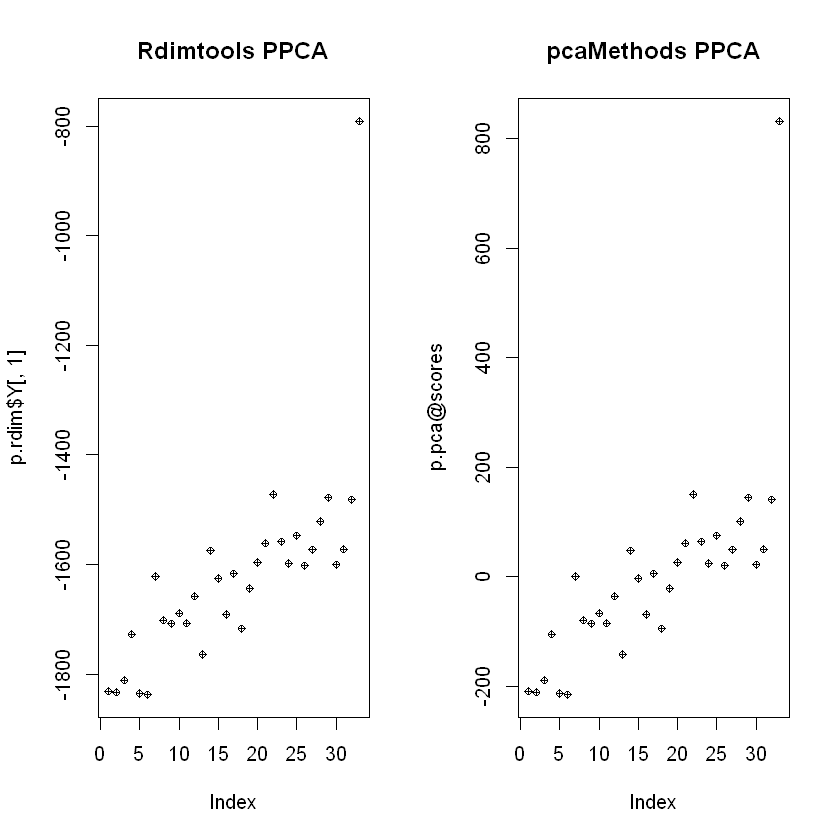

In [50]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(p.rdim1$Y[,1],  pch=10, cex=0.8,  main="Rdimtools PPCA")
plot(p.pca1@scores, pch=10, cex=0.8, main="pcaMethods PPCA")
par(opar)

## Dimension 3

In [51]:
p.rdim3 <- do.ppca(Hepta2008, ndim = 3)
p.pca3 <-  pca(Hepta2008, method="ppca", nPcs=3, seed=123)

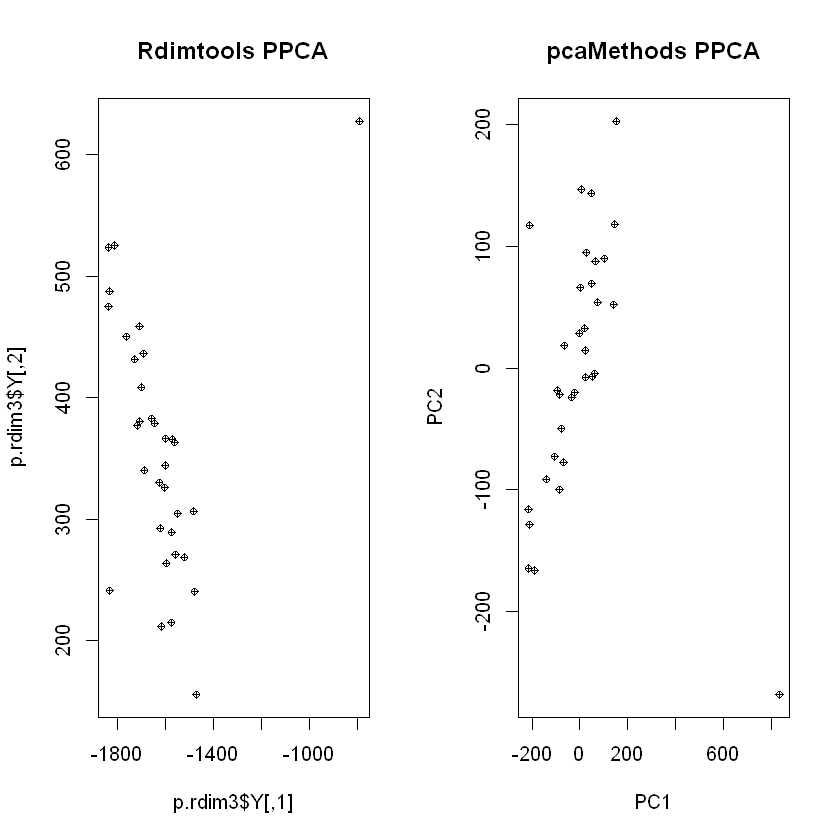

In [54]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(p.rdim3$Y,  pch=10, cex=0.8,  main="Rdimtools PPCA")
plot(p.pca3@scores, pch=10, cex=0.8, main="pcaMethods PPCA")
par(opar)

# Metric comparison

We are gonna use another dataset for testing purposes

In [3]:
decaAustria <- read.csv("Data/ProcessedDatasets/Decathlon_Austria82.csv")[2:10]
head(decaAustria)

,X100m,Salt.Longitud,Llençament.Pes,Salt.Alçada,X400m,X110.Tanques,Llençament.Disc,Salt.Perxa,Javelina
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,935,1010,807,925,955,926,769,1028,767
2,817,1004,844,950,905,901,781,957,738
3,768,893,759,900,825,859,868,981,732
4,869,867,802,874,915,856,804,884,857
5,787,871,781,874,878,880,782,884,807
6,738,814,700,950,848,850,870,957,764


In [ ]:
library(MLmetrics)

In [19]:
rdim.method <- do.ppca(as.matrix(decaAustria), ndim = 2)
pca.method <-  ppca(as.matrix(decaAustria), nPcs = 1, seed = 1977)

Dimension 1:
RMSE: 52.47
Median Absolute Percentage Error Loss: 0.02 
Plot Comparison:

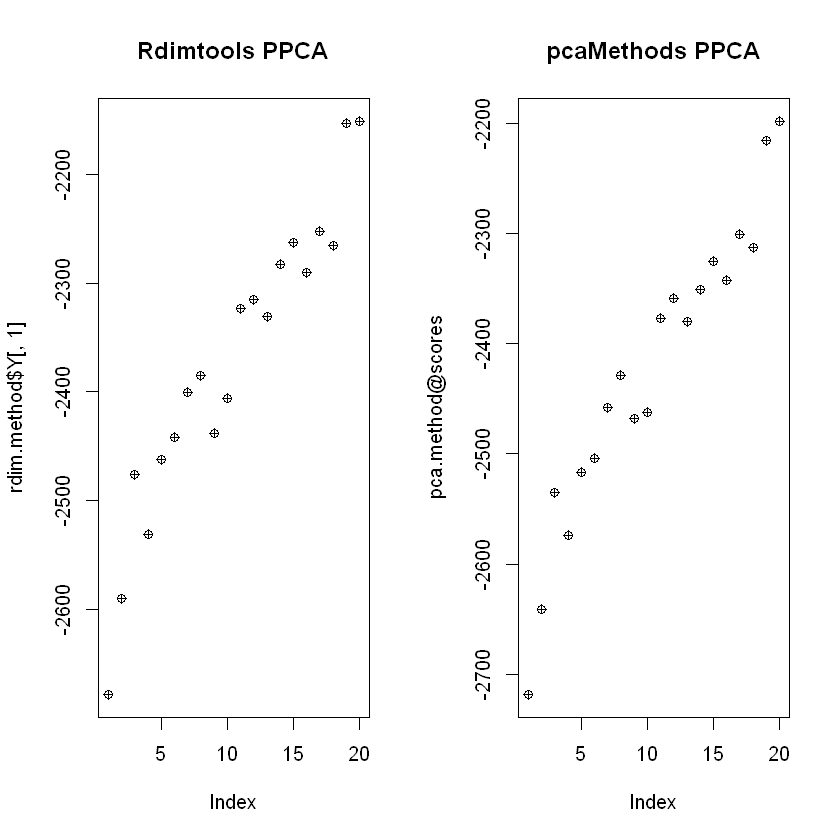

In [20]:
cat(paste0("Dimension 1:\nRMSE: ",round(RMSE(pca.method@scores,rdim.method$Y[,1]),2),
          "\nMedian Absolute Percentage Error Loss: ",round(MedianAPE(pca.method@scores,rdim.method$Y[,1]),2)),
           "\nPlot Comparison:")

opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(rdim.method$Y[,1],  pch=10,  main="Rdimtools PPCA")
plot(pca.method@scores, pch=10,  main="pcaMethods PPCA")
par(opar)

Let's try now increasing the number of components:

In [21]:
rdim.method2 <- do.ppca(as.matrix(decaAustria), ndim = 3)
pca.method2 <-  ppca(as.matrix(decaAustria), nPcs = 3, seed = 1977)

Dimension 3:
RMSE: 230.83
Median Absolute Percentage Error Loss: 0.12 
Plot Comparison:

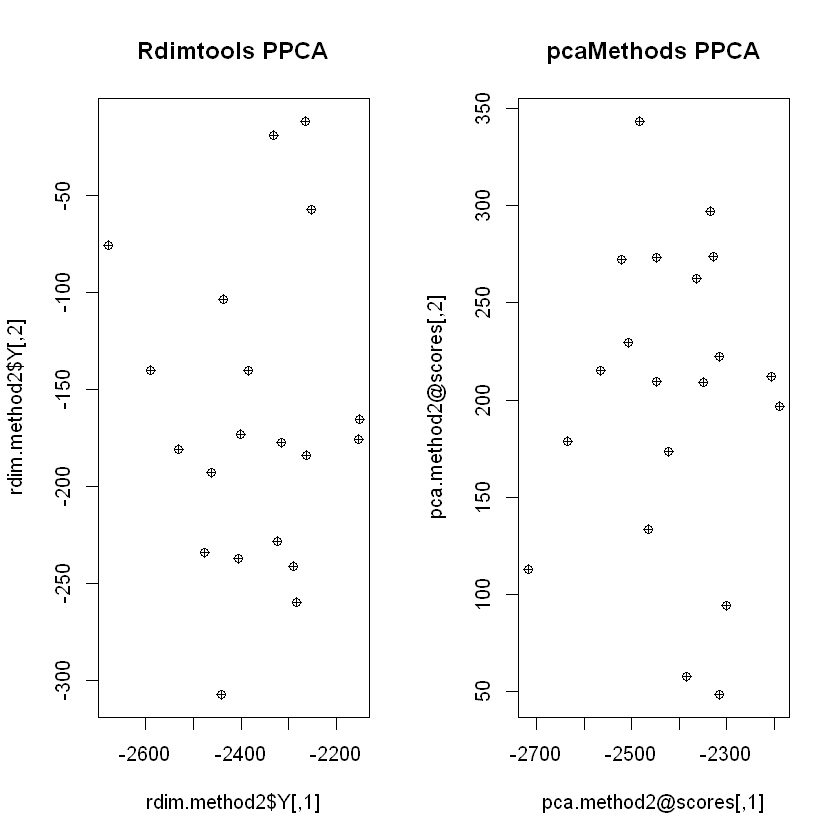

In [22]:
cat(paste0("Dimension 3:\nRMSE: ",round(RMSE(pca.method2@scores,rdim.method2$Y),2),
          "\nMedian Absolute Percentage Error Loss: ",round(MedianAPE(pca.method2@scores,rdim.method2$Y),2)),
           "\nPlot Comparison:")

opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(rdim.method2$Y,  pch=10,  main="Rdimtools PPCA")
plot(pca.method2@scores, pch=10,  main="pcaMethods PPCA")
par(opar)

If we try to estimate 4 or more components we start getting inaccuracy warnings.

In [23]:
ppca(as.matrix(decaAustria), nPcs = 5, seed = 1977)

Warning message in orth(C):
"Precision for components 4 - 5 is below .Machine$double.eps. 
Results for those components are likely to be inaccurate!!
"


ppca calculated PCA
Importance of component(s):
                 PC1     PC2       PC3      PC4     PC5
R2            0.9753 0.00681 0.0008379 0.005126 0.01116
Cumulative R2 0.9753 0.98209 0.9829305 0.988057 0.99922
 	Variables
 	Samples
0 	NAs (  %)
5 	Calculated component(s)
Data was NOT mean centered before running PCA 
Data was NOT scaled before running PCA 
Scores structure:
[1] 20  5
Loadings structure:
[1] 9 5

# Bayesian PCA Comparison

# Plot comparison

## Dimension 1

With the Bayesian method we also cannot call the rdimtools bayesian function with dimension 1, so we do the same trick

In [4]:
b.rdim1 <- do.bpca(Hepta2008, ndim = 2)
b.pca1 <-  pca(Hepta2008, method="bpca", nPcs=1, seed=123)

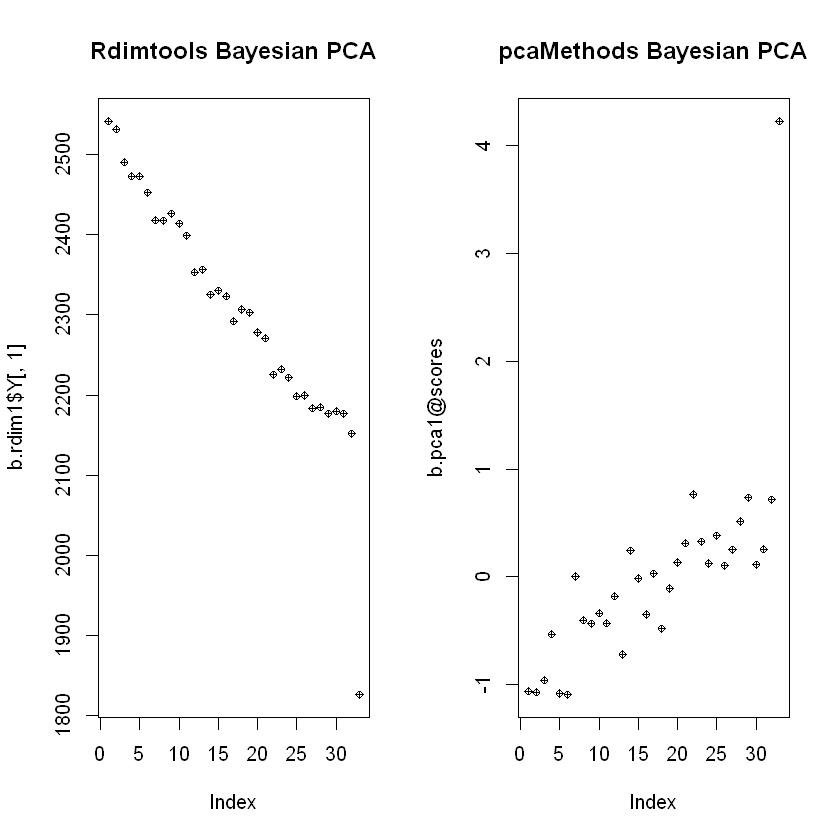

In [5]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(b.rdim1$Y[,1],  pch=10, cex=0.8,  main="Rdimtools Bayesian PCA")
plot(b.pca1@scores, pch=10, cex=0.8, main="pcaMethods Bayesian PCA")
par(opar)

## Dimension 3

In [11]:
b.rdim3 <- do.bpca(Hepta2008, ndim = 3)
b.pca3 <-  pca(Hepta2008, method="bpca", nPcs=3, seed=123)

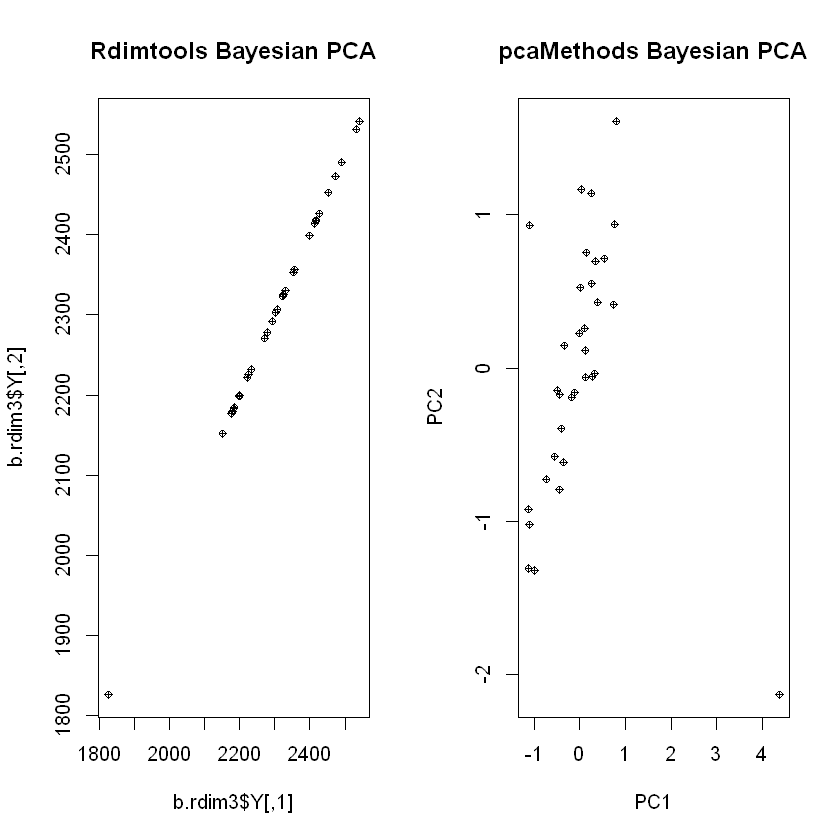

In [13]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(b.rdim3$Y,  pch=10, cex=0.8,  main="Rdimtools Bayesian PCA")
plot(b.pca3@scores, pch=10, cex=0.8, main="pcaMethods Bayesian PCA")
par(opar)

# Metric comparison

Let's perform the same tests with the Bayesian approximation.

In [16]:
b.rdim.method <- do.bpca(as.matrix(decaAustria), ndim = 2)
b.pca.method <-  bpca(as.matrix(decaAustria), nPcs = 1, seed = 1977)

Dimension 1:
RMSE: 2427.02
Median Absolute Percentage Error Loss: 1 
Plot Comparison:

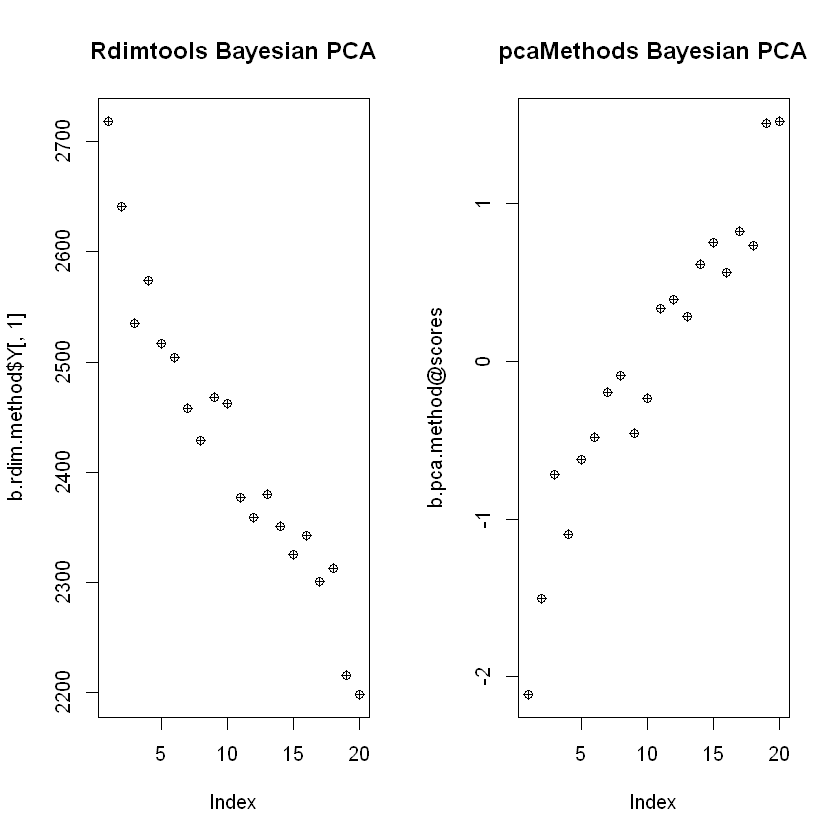

In [22]:
cat(paste0("Dimension 1:\nRMSE: ",round(RMSE(b.pca.method@scores,b.rdim.method$Y[,1]),2),
          "\nMedian Absolute Percentage Error Loss: ",round(MedianAPE(b.pca.method@scores,b.rdim.method$Y[,1]),2)),
           "\nPlot Comparison:")

opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(b.rdim.method$Y[,1],  pch=10,  main="Rdimtools Bayesian PCA")
plot(b.pca.method@scores, pch=10,  main="pcaMethods Bayesian PCA")
par(opar)

Let's try now increasing the number of components:

In [20]:
b.rdim.method2 <- do.ppca(as.matrix(decaAustria), ndim = 3)
b.pca.method2 <-  ppca(as.matrix(decaAustria), nPcs = 3, seed = 1977)

Dimension 3:
RMSE: 230.83
Median Absolute Percentage Error Loss: 0.12 
Plot Comparison:

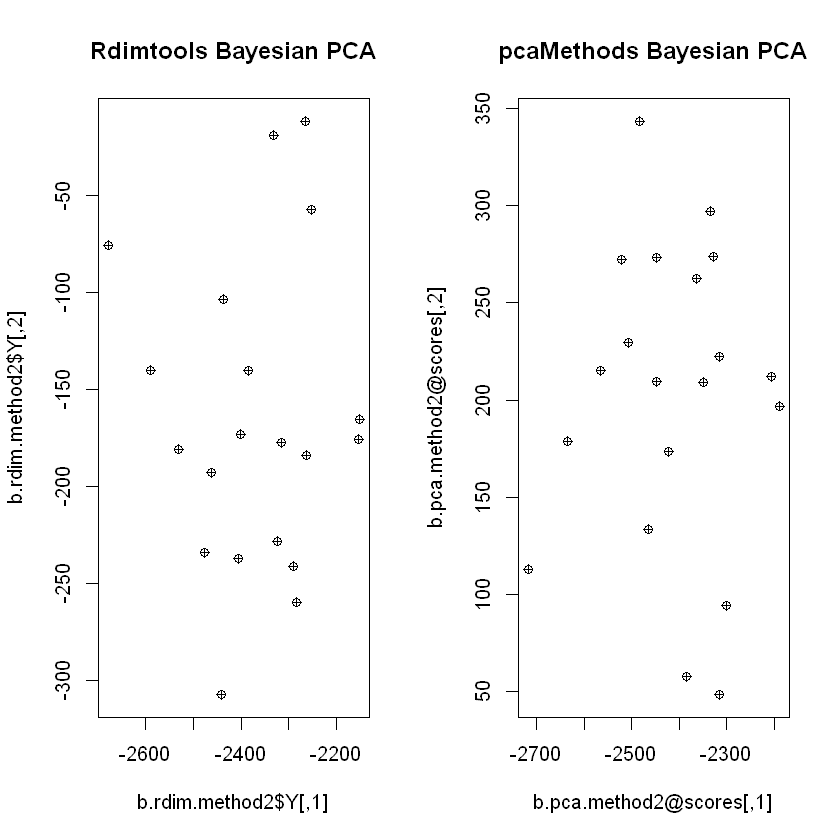

In [25]:
cat(paste0("Dimension 3:\nRMSE: ",round(RMSE(b.pca.method2@scores,b.rdim.method2$Y),2),
          "\nMedian Absolute Percentage Error Loss: ",round(MedianAPE(b.pca.method2@scores,b.rdim.method2$Y),2)),
           "\nPlot Comparison:")

opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(b.rdim.method2$Y,  pch=10,  main="Rdimtools Bayesian PCA")
plot(b.pca.method2@scores, pch=10,  main="pcaMethods Bayesian PCA")
par(opar)

### Extra: Conventional PCA Comparison

In [43]:
pca.rdim <- do.pca(as.matrix(decaAustria), ndim = 2)
pca.methods <-  pca(as.matrix(decaAustria), nPcs = 2, seed = 1977)

Dimension 2 PCA:
RMSE: 1695.18
Median Absolute Percentage Error Loss: 1.03 
Plot Comparison:

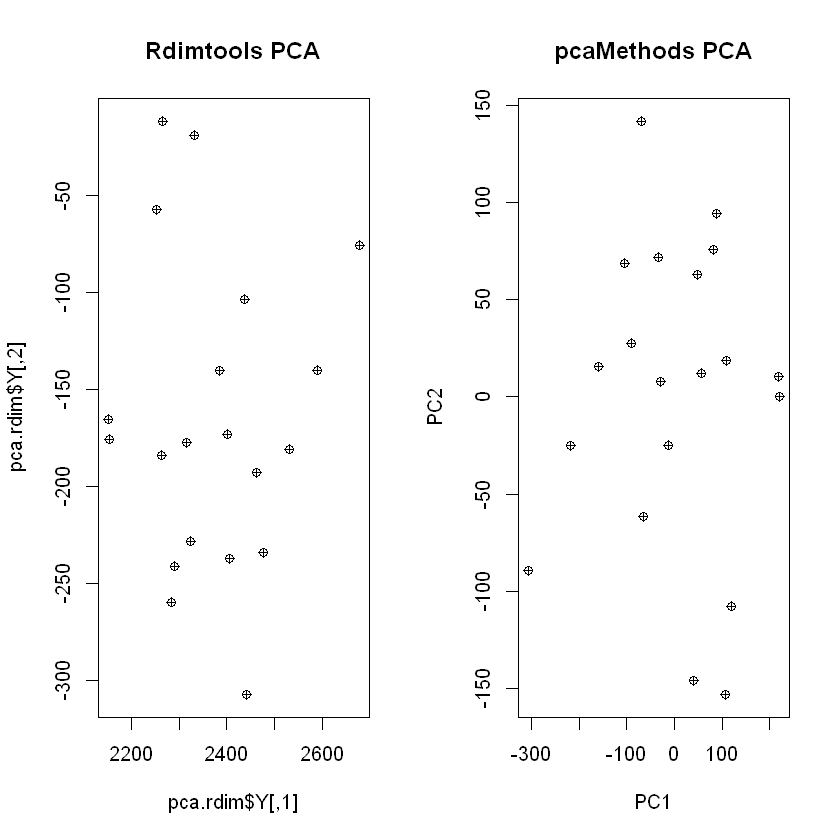

In [44]:
cat(paste0("Dimension 2 PCA:\nRMSE: ",round(RMSE(pca.methods@scores,pca.rdim$Y),2),
          "\nMedian Absolute Percentage Error Loss: ",round(MedianAPE(pca.methods@scores,pca.rdim$Y),2)),
           "\nPlot Comparison:")

opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(pca.rdim$Y,  pch=10,  main="Rdimtools PCA")
plot(pca.methods@scores, pch=10,  main="pcaMethods PCA")
par(opar)

### PCA vs. Bayesian PCA

In [32]:
pca.bayesian <-  bpca(as.matrix(decaAustria), nPcs = 2, seed = 1977)

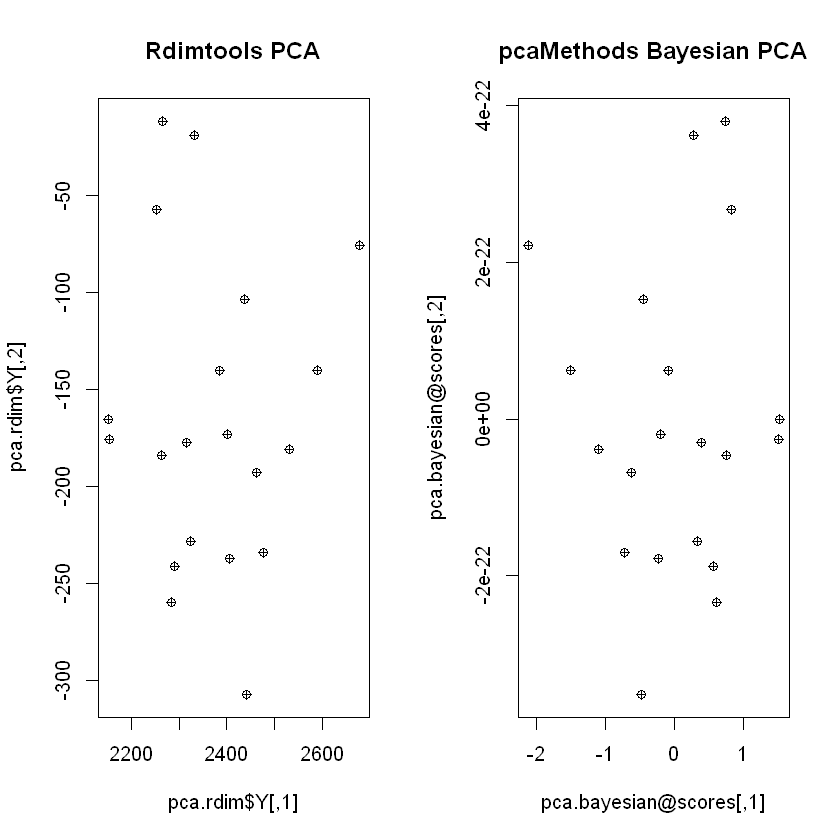

In [36]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
plot(pca.rdim$Y,  pch=10,  main="Rdimtools PCA")
plot(pca.bayesian@scores, pch=10,  main="pcaMethods Bayesian PCA")
par(opar)